# Keras introduction, homework 5

## Preload

### Libraries

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
import random

TensorFlow 1.x selected.


Using TensorFlow backend.


### Version

In [2]:
print('TF version ', tf.__version__)

TF version  1.15.2


## Excercise 1

1. Your task is to write a feed-forward artificial neural
network which will try to classify handwritten digits


Your neural network should have 3 Dense layers:


1.   input layer with 128 neurons and activation function
ReLu
2.   hidden layer with 128 neurons and activation function
ReLu

3.   output layer with 10 neurons and activation function
Softmax

*   As the loss function, you should use
categorical_crossentropy, the optimizer should be
adam, and the metric should be accuracy
*   Try as many epochs as you can (for example 20, 30)
*   Print images, their labels and neural network predictions
for 2 randomly chosen images from the test set





Import MNIST dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


Set class names

In [4]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

Normalize inputs from 0-255 to 0-1

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Define the model

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Plot of model

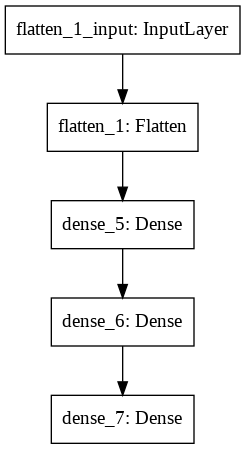

In [22]:
tf.keras.utils.plot_model(model, to_file='model_combined.png')

Compile the model

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [24]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2339 - acc: 0.9308
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0970 - acc: 0.9705
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0688 - acc: 0.9784
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0520 - acc: 0.9830
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0407 - acc: 0.9871
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0330 - acc: 0.9892
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0273 - acc: 0.9910
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0226 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0219 - acc: 0.9923
Epoch 10/10
60000/60000 [==============================] - 

Evaluate accuracy

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
print('\nCNN Error:', test_acc)


CNN Error: 0.9779


Prediction

In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
prediction = probability_model.predict(test_images)

### Print images, their labels and neural network predictions for 2 randomly chosen images from the test set

Methods for draw plots

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)
  plt.colorbar()
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Indexes

In [32]:
INDEX_1 = random.randint(0, len(prediction))
INDEX_2 = random.randint(0, len(prediction))

First randomly shosen image


PREDICTION: [1.8275523e-08 6.5316907e-10 1.0717423e-09 5.7991323e-10 5.0748156e-12
 3.9609510e-11 1.1318294e-10 3.7178725e-09 1.0000000e+00 2.9613306e-10]

Image:



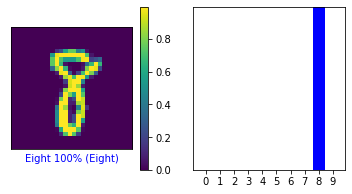

In [33]:
print("\nPREDICTION: " + str(prediction[INDEX_1]))
print("\nImage:\n")
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(INDEX_1, prediction[INDEX_1], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(INDEX_1, prediction[INDEX_1],  test_labels)
plt.show()

Second randomly shosen image


PREDICTION: [2.5770570e-09 1.0182908e-06 1.2338093e-07 1.0825621e-06 8.2151182e-06
 1.6550730e-10 5.5503840e-14 4.9415627e-05 1.9707128e-08 9.9994016e-01]

Image:



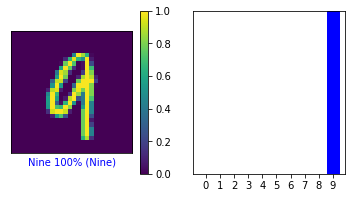

In [34]:
print("\nPREDICTION: " + str(prediction[INDEX_2]))
print("\nImage:\n")
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(INDEX_2, prediction[INDEX_2], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(INDEX_2, prediction[INDEX_2],  test_labels)
plt.show()

## Prepared by:

Viktor Surzhko